The very famous 1-D Schrodinger's Equation is given by,
$$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

We could rewrite the SE into,
$$\psi''(x) + \frac{2m}{\hbar^2}[E - V(x)]\psi(x) = 0$$

The above expression is compared to the Sturm-Liouville equation, and the eigenvalue problem,
$$(p(x)y')' + q(x)y + \lambda r(x)y = 0$$

where in our case of the SE, 
$p(x) = 1$, $q(x) = \frac{2m[E - V(x)]}{\hbar^2}$, and $r(x) = 0$.

Begin by importing the necessary libraries, and define the constants.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants for the problem (use natural units)
hbar = 1          # Reduced Planck's constant
m = 1             # Mass of the particle
alpha = 1         # Parameter alpha
lambda_ = 4    # Parameter lambda


Let's start by defining the potential function, $V(x)$, followed by the parameters. We also choose a range of $x \in [-L, L]$, where $L$ is large enough for $\psi(x) \to 0$.
We might as well plot and visualize the potential function $V(x)$, to get a glimpse of its shape. 

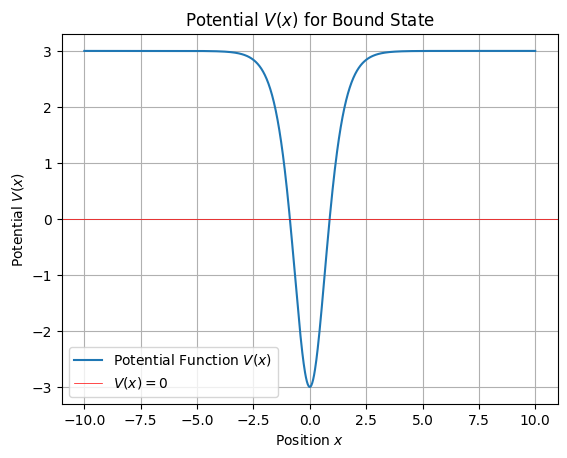

In [95]:
# Define the potential function
def V(x):
    return (hbar**2 / (2*m) * (alpha**2) *lambda_*(lambda_ - 1) * (0.5-1/(np.cosh(alpha*x)) ** 2))

# Create a range of x values for the potential region
x_min = -10
x_max = 10
num_points = 1000  # Number of points in the grid

x = np.linspace(x_min, x_max, num_points)

# Plotting the potential function to visualize it
plt.plot(x, V(x), label='Potential Function $V(x)$')
plt.xlabel('Position $x$')
plt.ylabel(r'Potential $V(x)$')  # Corrected label
plt.title(r'Potential $V(x)$ for Bound State')  # Corrected title
plt.axhline(0, color='red', linewidth=0.5, label=r'$V(x) = 0$')
plt.legend()
plt.grid(True)
plt.show()

n     Eigenvalue (E_n)    
-------------------------
0     -1.500000           
1     1.000000            
2     2.500000            
3     3.000000            
4     2.500000            
5     1.000000            
6     -1.500000           
7     -5.000000           
8     -9.500000           
9     -15.000000          


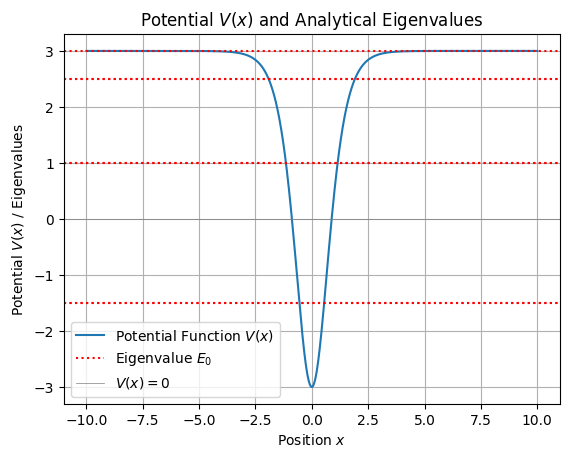

In [96]:
# Analytical eigenvalue formula for the given potential
def analytical_eigenvalue(n, alpha=1, lambda_=4):
    """
    Calculate the nth eigenvalue using the analytical formula:
    En = (ħ² / 2m) * [α² * (λ(λ-1) / 2 - (λ-1-n)²)]
    Here ħ = m = 1 for simplicity.
    """
    return (alpha**2 / 2) * (lambda_ * (lambda_ - 1) / 2 - (lambda_ - 1 - n)**2)

# Calculate the first 10 eigenvalues
num_eigenvalues = 10
eigenvalues = [analytical_eigenvalue(n, alpha, lambda_) for n in range(num_eigenvalues)]

# Print a table of eigenvalues
print(f"{'n':<5} {'Eigenvalue (E_n)':<20}")
print("-" * 25)
for n, E_n in enumerate(eigenvalues):
    print(f"{n:<5} {E_n:<20.6f}")

# Plot the potential with only the first 7 eigenvalues as horizontal lines
plt.plot(x, V(x), label='Potential Function $V(x)$')
for n, E_n in enumerate(eigenvalues[:7]):  # Only plotting the first 7 eigenvalues
    plt.axhline(E_n, color='red', linestyle='dotted', label=f'Eigenvalue $E_{n}$' if n == 0 else None)

plt.xlabel('Position $x$')
plt.ylabel(r'Potential $V(x)$ / Eigenvalues')  # Adjusted label
plt.title(r'Potential $V(x)$ and Analytical Eigenvalues')
plt.axhline(0, color='gray', linewidth=0.5, label=r'$V(x) = 0$')
plt.legend()
plt.grid(True)
plt.show()


First turning point found at x = 1.9140842356665502
Second turning point (symmetric) at x = -1.9140842356665502
Number of iterations: 54


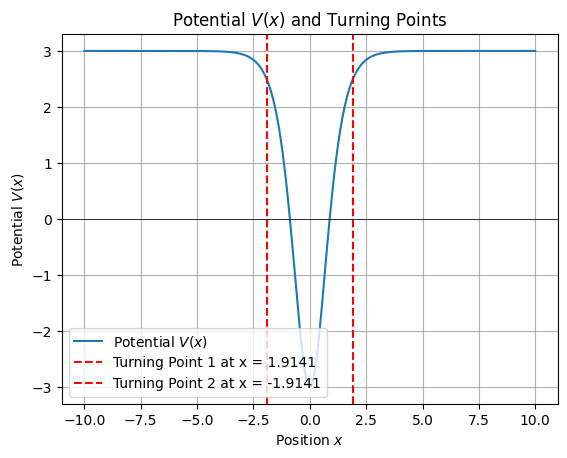

In [97]:
#Make an Eigenvalue, E guess. 
E_x_guess = 2.5

# Define the bisection method
def bisection_method(f, a, b, E_x, tol=1e-15, max_iter=1000):
    if f(a, E_x) * f(b, E_x) > 0:
        raise ValueError('Function has the same signs at both endpoints of the interval.')
    i = 1
    while (b - a) / 2 > tol and i < max_iter:
        c = (a + b) / 2
        fc = f(c, E_x)
        if fc * f(a, E_x) < 0:
            b = c
        elif fc * f(b, E_x) < 0:
            a = c
        elif fc == 0: 
            return c, i
        i += 1
    c = (a + b) / 2  # Final midpoint
    return c, i

# Function for turning points (E - V(x))
def f(x, E_x):
    return E_x - V(x)


# Define the bracketing interval for the bisection method
a = 0
b = 15 / alpha  # Right end of the potential well region (chosen empirically)

# Use the bisection method to find the turning point
turning_point_1, iterations = bisection_method(f, a, b, E_x_guess, tol=1e-15, max_iter=1000)

# Since the potential is symmetric, the turning points are negative of each other
turning_point_2 = -turning_point_1

# Output the results
print(f"First turning point found at x = {turning_point_1}")
print(f"Second turning point (symmetric) at x = {turning_point_2}")
print(f"Number of iterations: {iterations}")

# Plotting the potential and both turning points
plt.plot(x, V(x), label=r'Potential $V(x)$')
plt.axvline(turning_point_1, color='red', linestyle='dashed', label=f'Turning Point 1 at x = {turning_point_1:.4f}')
plt.axvline(turning_point_2, color='red', linestyle='dashed', label=f'Turning Point 2 at x = {turning_point_2:.4f}')
plt.xlabel('Position $x$')
plt.ylabel(r'Potential $V(x)$')
plt.title(r'Potential $V(x)$ and Turning Points')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#where the energy we initially guessed
def E(x):
    return 0 * x + E_x_guess

#Set the function to calculate k^2
def k_squared(E_x_guess, V):
    return -2 * m / hbar ** 2 * (E_x_guess - V)

**<span style="font-size: 24px;">Numerov Method</span>**


The Numerov method is intuitively based on a finite difference approximation, similar to other grid-based techniques for solving PDEs and ODEs. With known values at two initial points, the method allows us to iteratively calculate the function values at the remaining grid points. This propagation can be done from either the left or right boundary, leading to two separate numerical solutions, which we can refer to as $\psi_l$ and $\psi_r$.
Rewriting the Schrodinger's Equation,
$$\psi''(x) = -k^2\psi(x)$$
where $k^2(x) = \frac{2m}{\hbar^2}[E - V(x)].$


We start with Taylor's expansions of the wavefunctions
$$\psi(x+h)\simeq\psi(x)+h\psi^{(1)}(x)+\frac{h^{2}}{2}\psi^{(2)}(x)+\frac{h^{3}}{3!}\psi^{(3)}(x)+\frac{h^{4}}{4!}\psi^{(4)}(x)+\cdot\cdot\cdot$$
$$\psi(x-h)\simeq\psi(x)-h\psi^{(1)}(x)+\frac{h^{2}}{2}\psi^{(2)}(x)-\frac{h^{3}}{3!}\psi^{(3)}(x)+\frac{h^{4}}{4!}\psi^{(4)}(x)+\cdot\cdot\cdot$$

The expansion of $\psi(x-h)$ has odd powers of $h$ appearig wiith $(-)$ signs, hence all odd powers cancel when $\psi(x+h)$ and $\psi(x-h)$ are summed together.
$$\psi(x+h) + \psi(x-h) \simeq 2\psi(x) + h^2\psi^{(2)}(x) + \frac{h^4}{12}\psi^{(4)}(x) + \mathcal{O}(h^6)$$
We get,
$$\psi^{(2)}(x) \simeq \frac{\psi(x+h) + \psi(x-h) - 2\psi(x)}{h^2} - \frac{h^2}{12}\psi^{(4)}(x) + \mathcal{O}(h^4)$$
Apply the operator $1 + \frac{h^2}{12}\frac{d^2}{dx^2}$ to the SE,
$$\psi^{(2)}(x) + \frac{h^2}{12}\psi^{(4)}(x) + k^2(x)\psi + \frac{h^2}{12}\frac{d^2}{dx^2}[k^2(x)\psi^{(4)}(x)] = 0$$
By substituting the derived expression for $\psi^{(2)}(x)$, we eliminate $\psi^{(4)}(x)$:
$$\frac{\psi(x+h) + \psi(x-h) - 2\psi(x)}{h^2} + k^2(x)\psi(x) + \frac{h^2}{12}\frac{d^2}{dx^2}[k^2(x)\psi(x)] \simeq 0$$
Use central-difference approximation for 2nd derivative of $-k^2\psi(x)$
$$h^2\frac{d^2[k^2(x)\psi(x)]}{dx^2} \simeq [(k^2\psi)_{x+h} - (k^2\psi)_x] + [(k^2\psi)_{x-h} - (k^2\psi)_x]$$
After the subsitution, we finally obtain the Numerov Algorithm,
$$\psi(x+h) \simeq \frac{2\left[1 - \frac{5}{12}h^2k^2(x)\right]\psi(x) - \left[1 + \frac{h^2}{12}k^2(x-h)\right]\psi(x-h)}{\frac{1 + h^2k^2(x+h)}{12}}$$
where $h$ is the step size.

In our case, simply denote $\psi(x_{i+1})$ for iteration from left, and $\psi(x_{i-1})$ for interation from right.

In [ ]:
#Numerov commences
pot_width = (turning_point_2 - turning_point_1)/2
# 0 here indicate the midpoint, due to symmetry
x_0_left = 0 - (10*pot_width)   # Solution approaches zero at left-most
x_0_right = 0 + (10*pot_width)  # Solution approaches zero at right-most
x1, x2 = turning_point_1 , turning_point_2

#Boundary Condition
psi_0_right = psi_0_left = 0

n = 50000
# Step Size
h = (x_0_right - x_0_left) / n
x = np.linspace(x_0_left, x_0_right, n + 1)
                
#Numerov algorithm
# Iterate from left boundaryt to tp2
n_left = int((x2 - x_0_left) / h)
x_left = np.linspace(x_0_left, x2, n_left + 1) 

# Using Numerov method to iterate the wavefunction, from the left boundary to the first turning point
def Numerov_from_left(psi_left, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(n_left + 1)
    y[0] = psi_left
    y[1] = psi_left + 1e-10
    for i in range (1, n_left):
        y[i + 1] = (y[i] * (2 + 10 / 12 * h ** 2 * k2[i]) - y[i - 1] * (1 - h ** 2 / 12 * k2[i - 1])) / (1 - h **2 / 12 * k2[i + 1])
    return y


# From right to tp1
n_right = int((x_0_right - x1) / h)
x_right = np.linspace(x1, x_0_right, n_right + 1)

# Using Numerov method to iterate the wavefunction, from the right boundary to the first turning point
def Numerov_from_right(psi_right, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(len(V_x))
    y[-1] = psi_right
    y[-2] = psi_right + 1e-10
    for i in range(1, len(V_x) - 1):
        y[-(i + 2)] = (y[-(i + 1)] * (2 + 10 / 12 * h ** 2 * k2[-(i + 1)]) - 
                       y[-i] * (1 - h ** 2 / 12 * k2[-i])) / (1 - h ** 2 / 12 * k2[-(i + 2)])
    return y

#Collecting points from each side
left_values = Numerov_from_left(psi_0_left, h, E_x_guess, V(x_left)) / np.max(Numerov_from_left(psi_0_left, h, E_x_guess, V(x_left)))
right_values = Numerov_from_right(psi_0_right, h, E_x_guess, V(x_right)) / np.max(Numerov_from_right(psi_0_right, h, E_x_guess, V(x_right)))

# Plot the potential and wavefunctions
plt.plot(x_left, left_values, label='From Left Boundary')
plt.plot(x_right, right_values, label='From Right Boundary')
plt.axvline(turning_point_1, linestyle='--', color='black', label=f'Left root = {turning_point_1}')
plt.axvline(turning_point_2, linestyle='--', color='blue', label=f'Right root = {turning_point_2}')

# Labels and title
plt.title(rf'$V(x)$')
plt.xlabel('$x$')
plt.ylabel(r'Wavefunction, $\psi(x)$')

# Display the plot with legend
plt.legend(framealpha=0.5, frameon=True)
plt.tight_layout()
plt.grid(True)
plt.show()